In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
# Define image dimensions for preprocessing.
height = 300
width = 300

In [3]:
# Define directories for training and validation data.
train_dir = "Dataset(2000)\Training"
validation_dir = "Dataset(2000)\Validation"
test_dir = "Dataset(2000)\Testing"

In [4]:
# Number of batches for data generators.
batch_size = 4

In [5]:
# Data augmentation for training images.
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rotation_range=90,
                                   horizontal_flip=True, vertical_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(height, width),batch_size=batch_size, class_mode='binary')

Found 55 images belonging to 2 classes.


In [6]:
# Data augmentation for validation images.
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rotation_range=90,
                                        horizontal_flip=True, vertical_flip=True)
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(height, width),
                                                              batch_size=batch_size, class_mode='binary')

Found 35 images belonging to 2 classes.


In [7]:
# Data augmentation for validation images.
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rotation_range=90,
                                        horizontal_flip=True, vertical_flip=True)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(height, width),
                                                              batch_size=batch_size, class_mode='binary')

Found 4 images belonging to 2 classes.


In [8]:
# Load ResNet50 model without top layer.
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(height, width, 3))


In [9]:
# Add custom top layers for classification.
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

In [10]:
# Combine base model with custom top layers
finetune_model = Model(inputs=base_model.input, outputs=predictions)


In [11]:
# Freeze layers of the base model
for layer in base_model.layers:
    layer.trainable = False


In [12]:
# Compile the model
finetune_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])


In [13]:
# Checkpoint and early stopping
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max', restore_best_weights=True)

In [14]:
# Train the model on training data with validation on validation data.
history = finetune_model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=50,
                              validation_data=validation_generator, validation_steps=len(validation_generator),
                              callbacks=[checkpoint, early_stop])


C:\Users\ms036\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5171 - loss: 53.7016
Epoch 1: val_accuracy improved from -inf to 0.57143, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 90s 6s/step - accuracy: 0.5214 - loss: 54.5134 - val_accuracy: 0.5714 - val_loss: 68.3790
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5633 - loss: 110.8790
Epoch 2: val_accuracy did not improve from 0.57143
14/14 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.5657 - loss: 110.2703 - val_accuracy: 0.4571 - val_loss: 93.3575
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5210 - loss: 99.8281 
Epoch 3: val_accuracy improved from 0.57143 to 0.71429, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step - accuracy: 0.5311 - loss: 99.5974 - val_accuracy: 0.7143 - val_loss: 61.9411
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7036 - loss: 80.5682
Epoch 4: val_accuracy did not improve from 0.71429
14/14 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.7015 - loss: 81.0205 - val_accuracy: 0.7143 - val_loss: 55.7521
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6852 - loss: 65.0385
Epoch 5: val_accuracy did not improve from 0.71429
14/14 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - accuracy: 0.6844 - loss: 65.9454 - val_accuracy: 0.6571 - val_loss: 41.2080
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7150 - loss: 92.8919
Epoch 6: val_accuracy did not improve from 0.71429
14/14 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.7207 - loss: 90.1862 - val_accuracy: 0.7143 - val_loss: 44.3111
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8102 - loss: 49.5441
Epoch 7: val_accuracy improved from 0.71429

14/14 ━━━━━━━━━━━━━━━━━━━━ 76s 6s/step - accuracy: 0.8108 - loss: 49.0671 - val_accuracy: 0.7429 - val_loss: 35.4793
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7400 - loss: 43.4358
Epoch 8: val_accuracy did not improve from 0.74286
14/14 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.7415 - loss: 43.9042 - val_accuracy: 0.7429 - val_loss: 59.5776
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8499 - loss: 26.6346
Epoch 9: val_accuracy did not improve from 0.74286
14/14 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 0.8490 - loss: 27.0731 - val_accuracy: 0.7429 - val_loss: 51.5276
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6907 - loss: 40.5218
Epoch 10: val_accuracy improved from 0.74286 to 0.80000, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 74s 5s/step - accuracy: 0.6907 - loss: 41.5461 - val_accuracy: 0.8000 - val_loss: 28.9355
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6465 - loss: 59.4423
Epoch 11: val_accuracy did not improve from 0.80000
14/14 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.6507 - loss: 58.9045 - val_accuracy: 0.6286 - val_loss: 96.7518
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6780 - loss: 59.6642
Epoch 12: val_accuracy did not improve from 0.80000
14/14 ━━━━━━━━━━━━━━━━━━━━ 96s 7s/step - accuracy: 0.6788 - loss: 59.9752 - val_accuracy: 0.4857 - val_loss: 86.1565
Epoch 13/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7071 - loss: 49.5784
Epoch 13: val_accuracy did not improve from 0.80000
14/14 ━━━━━━━━━━━━━━━━━━━━ 78s 6s/step - accuracy: 0.7073 - loss: 49.8465 - val_accuracy: 0.6857 - val_loss: 62.5450
Epoch 14/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7487 - loss: 64.8345
Epoch 14: val_accuracy did not impro

14/14 ━━━━━━━━━━━━━━━━━━━━ 93s 6s/step - accuracy: 0.8404 - loss: 32.3320 - val_accuracy: 0.8286 - val_loss: 44.3680
Epoch 17/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7754 - loss: 30.5703
Epoch 17: val_accuracy did not improve from 0.82857
14/14 ━━━━━━━━━━━━━━━━━━━━ 64s 4s/step - accuracy: 0.7734 - loss: 30.7594 - val_accuracy: 0.6000 - val_loss: 29.0787
Epoch 18/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8295 - loss: 28.9493
Epoch 18: val_accuracy did not improve from 0.82857
14/14 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.8300 - loss: 28.9810 - val_accuracy: 0.6857 - val_loss: 99.9791
Epoch 19/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7006 - loss: 44.1693
Epoch 19: val_accuracy did not improve from 0.82857
14/14 ━━━━━━━━━━━━━━━━━━━━ 75s 5s/step - accuracy: 0.7048 - loss: 43.3562 - val_accuracy: 0.6857 - val_loss: 40.7643
Epoch 20/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6045 - loss: 52.3343
Epoch 20: val_accuracy improved from

14/14 ━━━━━━━━━━━━━━━━━━━━ 78s 6s/step - accuracy: 0.6102 - loss: 51.2391 - val_accuracy: 0.8857 - val_loss: 28.2495
Epoch 21/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8748 - loss: 17.8579
Epoch 21: val_accuracy did not improve from 0.88571
14/14 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.8723 - loss: 18.0806 - val_accuracy: 0.8571 - val_loss: 27.2412
Epoch 22/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8764 - loss: 35.6200
Epoch 22: val_accuracy did not improve from 0.88571
14/14 ━━━━━━━━━━━━━━━━━━━━ 68s 5s/step - accuracy: 0.8749 - loss: 35.2092 - val_accuracy: 0.8857 - val_loss: 30.5341
Epoch 23/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8949 - loss: 8.6766
Epoch 23: val_accuracy did not improve from 0.88571
14/14 ━━━━━━━━━━━━━━━━━━━━ 110s 7s/step - accuracy: 0.8947 - loss: 8.7500 - val_accuracy: 0.8000 - val_loss: 50.6917
Epoch 24/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7303 - loss: 14.2801
Epoch 24: val_accuracy did not improv

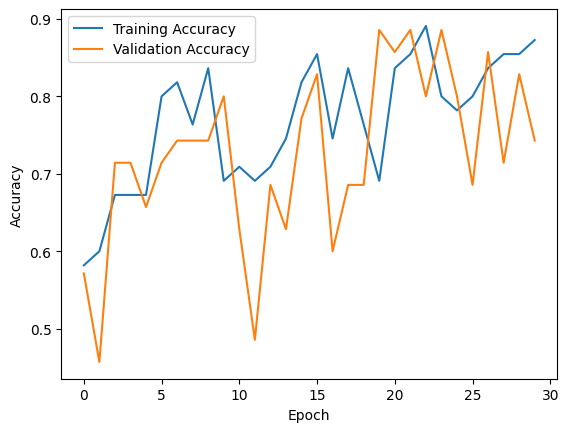

In [15]:

# Plot training and validation accuracy over epochs.
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


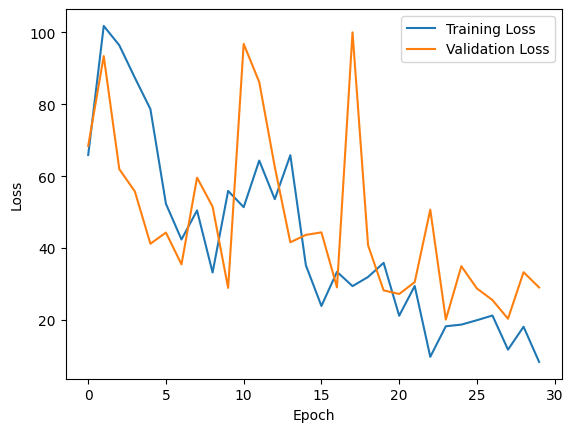

In [16]:
# Plot training and validation loss over epochs.
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [17]:
# Testing the model
def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(height, width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Real"
    else:
        return "Fake"


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


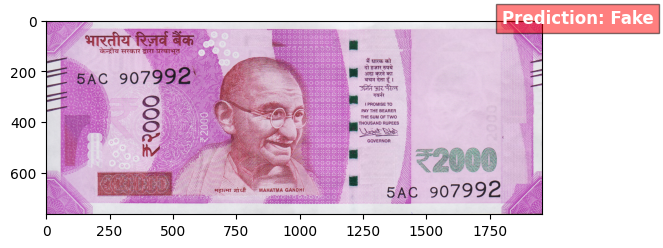

Prediction: Fake


In [18]:
# Specify the image path
test_img_path = r"Dataset(2000)\Testing\Fake\fake 1.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10,f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


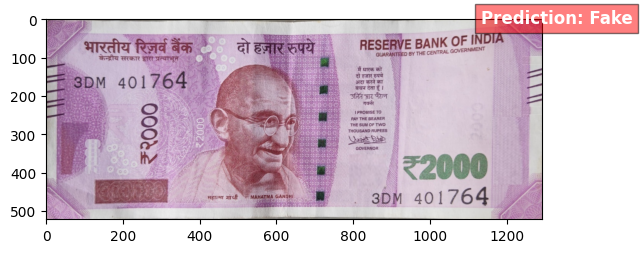

Prediction: Fake


In [19]:
# Specify the image path
test_img_path = r"Dataset(2000)\Testing\Fake\fake 2.jpg"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10,f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


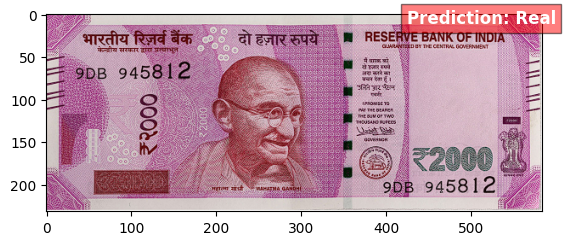

Prediction: Real


In [20]:
# Specify the image path
test_img_path = r"Dataset(2000)\Testing\Real\2.png"

# Load and display the image
img = image.load_img(test_img_path)
plt.imshow(img)

# Predict the image and display the prediction
prediction = predict_image(finetune_model, test_img_path)

img_width, img_height = img.size

# Use plt.text to add the prediction on the image
plt.text(img_width - 160, 10,f'Prediction: {prediction}', fontsize=12, color='white', weight='bold', bbox=dict(facecolor='red', alpha=0.5))

# Show the modified plot
plt.show()

# Print the prediction in the console if needed
print("Prediction:", prediction)


In [21]:
# Calculate overall accuracy of the model on the validation set.
overall_accuracy = finetune_model.evaluate(validation_generator, steps=len(validation_generator), verbose=1)
# Print overall accuracy.
print("Validation Accuracy:", overall_accuracy[1])

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 539ms/step - accuracy: 0.8330 - loss: 35.2469
Validation Accuracy: 0.800000011920929


In [22]:
# Calculate overall accuracy of the model on the training set.
overall_accuracy_training = finetune_model.evaluate(train_generator, steps=len(train_generator), verbose=1)
# Print overall accuracy on training set.
print("Overall Accuracy on Training Set:", overall_accuracy_training[1])


14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 527ms/step - accuracy: 0.9588 - loss: 5.0154
Overall Accuracy on Training Set: 0.9454545378684998


9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 677ms/step


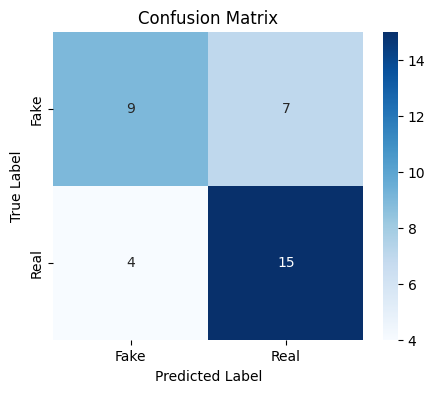

In [23]:
# Predict the whole validation set
validation_generator.reset()
predictions = finetune_model.predict(validation_generator, steps=len(validation_generator), verbose=1)
predicted_classes = (predictions > 0.5).astype(int)
true_classes = validation_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



In [24]:
# Mean Squared Error
mse = mean_squared_error(true_classes, predicted_classes)
print(f"Mean Squared Error: {mse*100}")

Mean Squared Error: 31.428571428571427


In [25]:
finetune_model.save("model_2000rs.keras")